# H7 implement kmeans algorithm
## student ID:2021141460344
## student Name:汪松

In [16]:
import numpy as np
from IPython.display import clear_output
import os
import matplotlib.pyplot as plt

(2, 301)


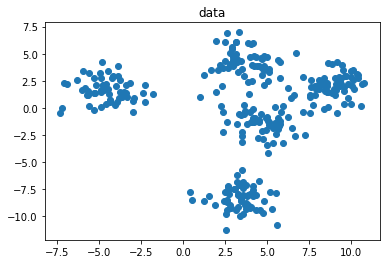

In [17]:
X = np.load("X.npy")
print(X.shape)
plt.figure()
plt.scatter(X[0,:],X[1,:])
plt.title("data")

plt.savefig("data.png")

In [18]:
l = np.array([[1,2,3],[4,5,6]])
o = np.random.permutation(3);
a = l[:,o[:2]]
print(a)
b = np.sum(l)
print(b)
print((np.where(l[0]==np.max(l[0])))[0])
for n in np.where(l[0]==np.max(l[0]))[0]:
    print(n)
print(np.median(l)) #中位数
print(X[0,0])

[[3 2]
 [6 5]]
21
[2]
2
3.5
-5.641750104823748


In [19]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def kmeans(X, K=6, max_iterations=100):
    if not os.path.exists("kmeans-k{}".format(K)):
        os.mkdir("kmeans-k{}".format(K))
    plt.figure()

    # step 1 init cluster centers
    x_idxs = np.random.permutation(X.shape[1])#若X有2行100列，X.shape[0]=2,X.shape[1] = 100
    #np.random.permutation随机打乱后面目标的顺序并返回一个([,,,...,,])从0到99的一个list
    u = X[:, x_idxs[:K]]#u为2xK的一个矩阵 相当于随机选了K个点出来当做cluster center，第一行为x坐标，第二行为y坐标
    
    # init all samples x into first cluster
    y = np.zeros((X.shape[1],))#y创建为一个全为0的一行一共x中数据个数的list,记录每一个点属于哪一个u

    for iter_idx in range(1, max_iterations+1):
        
        # D_ik denotes the distance between x_i and u_k
        D = np.zeros((X.shape[1], K))#D储存每一个点与u的距离，初始化全为0,D为301XK
        
        for i in range(X.shape[1]):
            ####### start Your code here ########
            #####################################
            # step 2
            for k in range(K):
                # rewrite the following line to calculate the distance between x_i and u_k
                # then store d_ik into D
                times = 0
                for m,n in zip(X[0],X[1]):  #x.shape[1]次
                    a = np.array([m,n])
                    b = np.array([u[0,k],u[1,k]])
                    D[times,k] = distance(a,b)
                    times += 1
            
            # rewrite the following line to classify the 𝑥_𝑖 to its nearest cluster c_𝑘 
            # y^{i} = argmin_{k}{d_{ik} | k = 1,2,...K}
            # remember that the i-th line of matrix D is the distances of x^{i} to each cluster center
            """ times = 0
            for m in D:
                for n in np.where(D[times]==np.min(D[times]))[0]:
                    y[times] = n
                times += 1 """
            y = D.argmin(axis= 1)
            ####### end Your code  ############
            ###################################
        
        # step 3
        for k in range(K):
            ####### start Your code here ########
            #####################################
            # Calculate the mean of the samples 𝑥 \in 𝑐_𝑘 as new 𝜇_𝑘 
            # remeber that the cluster information of x are stored in y
            meanx = 0.0
            meany = 0.0
            number = 0
            times = 0
            for n in y:
                if(n == k):
                    meanx += X[0,times]
                    meany += X[1,times]
                    number += 1
                times += 1
            meanx = meanx / number
            meany = meany / number
            
            u[0,k] = meanx
            u[1,k] = meany
            ####### end Your code  ############
            ###################################
        
        ## plot figures
        clear_output(wait=True)
        plt.scatter(X[0,:],X[1,:], c=y, s=8)
        plt.title("kmeans clustering at iter={}".format(iter_idx))
        
        #plot cluster centers
        plt.scatter(u[0,:],u[1,:], c=range(K), s=K, marker='o', linewidths=6)
        for k in range(K):
            plt.text(u[0,k], u[1,k], "u_{}".format(k),)
        
        plt.savefig("kmeans-k{}/iter={}.png".format(K, iter_idx))
        plt.show()
        
    return y

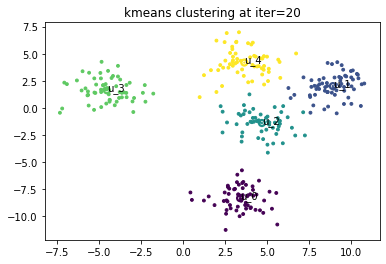

In [20]:
y = kmeans(X, K=5, max_iterations=20)